In [1]:
import cv2
import numpy as np
import dlib
from math import hypot
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("E:/eye_blink_detection/shape_predictor_68_face_landmarks.dat")

In [3]:
def midpoint(p1 ,p2):
    return int((p1.x + p2.x)/2), int((p1.y + p2.y)/2)

font = cv2.FONT_HERSHEY_PLAIN

def get_blinking_ratio(eye_points, facial_landmarks):
    left_point = (facial_landmarks.part(eye_points[0]).x, facial_landmarks.part(eye_points[0]).y)
    right_point = (facial_landmarks.part(eye_points[3]).x, facial_landmarks.part(eye_points[3]).y)
    center_top = midpoint(facial_landmarks.part(eye_points[1]), facial_landmarks.part(eye_points[2]))
    center_bottom = midpoint(facial_landmarks.part(eye_points[5]), facial_landmarks.part(eye_points[4]))

    hor_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2)
    ver_line = cv2.line(frame, center_top, center_bottom, (0, 255, 0), 2)

    hor_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))

    ratio = hor_line_lenght / ver_line_lenght
    #ratio=ver_line_lenght
    return ratio

capture = cv2.VideoCapture("E:/eye_blink_detection/blink_detection_demo.mp4")
frames_num = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

img=[]
for i in range(frames_num):
    capture.grab()
    if i % 10 != 0:
        continue
    success, frame = capture.retrieve()
    if not success:
        continue
    #print(frame.shape)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        #x, y = face.left(), face.top()
        #x1, y1 = face.right(), face.bottom()
        #cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        #print(landmarks)
        left_eye_ratio = get_blinking_ratio([36, 37, 38, 39, 40, 41], landmarks)
        right_eye_ratio = get_blinking_ratio([42, 43, 44, 45, 46, 47], landmarks)
        blinking_ratio = (left_eye_ratio + right_eye_ratio) / 2
        print(blinking_ratio)

        if blinking_ratio>4:
            #take_screenshot
            #plt.imshow(frame[i])
        #else:
            #wait
            cv2.putText(frame,"Take_screenshot: {}".format(blinking_ratio), (20, 20), font, 2, (255, 0, 0),2)
        elif blinking_ratio<4:
            cv2.putText(frame, "Eyelids_open: {}".format(blinking_ratio), (20, 20), font,2, (255, 0, 0),2)
    

3.156324810767936
2.815132994090434
2.8154337250829453
4.53422405812038
3.1886194725779102
2.814200289107892
3.1914188460475925
4.654156447150381
4.677932733986326
3.075263388698718
3.086074354419188
3.086074354419188
4.398381604898677
3.062174334008052
2.9885006372647194
2.9885706142243613
4.1345506464709185
2.970184437403468
2.8691337388891167
3.9463431834167837
3.204130985087925
3.037355876606644
3.0173887526520726
4.3642417831254186
2.9081781472561516


In [4]:
#prepare train,test data

import os
capture = cv2.VideoCapture("E:/eye_blink_detection/blink_detection_demo.mp4")
frames_num = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

img=[]
for i in range(frames_num):
    capture.grab()
    if i % 10 != 0:
        continue
    success, frame = capture.retrieve()
    if not success:
        continue
    #print(frame.shape)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    data="E:/eye_blink_detection/image_data"
    #cv2.imwrite(os.path.join(data,"{}.jpg".format(i)),frame)


#............................read unblinking data.........................

from glob import glob
folder=glob('E:/eye_blink_detection/dataset/image_data/')
#path = Path('E:/build_multi_face_recognizer/face_reconiger/*.jpg').expanduser()
 
file=[]
for folder in folder:
    #images = load_images_from_folder(folder)
    for filename in os.listdir(folder):
        if any([filename.endswith(x) for x in ['.jpg']]):
            file.append(os.path.join(folder, filename))

unblink_img=[]
y_unblink=[]
for i in file:
    images=cv2.imread(i)
    #print(images)
    if images is not None:
        unblink_img.append(images)
        y_unblink.append(0)
print(y_unblink)

#......................read blinking data...............................

folder=glob('E:/eye_blink_detection/dataset/blink-data/')
#path = Path('E:/build_multi_face_recognizer/face_reconiger/*.jpg').expanduser()
 
file=[]
for folder in folder:
    #images = load_images_from_folder(folder)
    for filename in os.listdir(folder):
        if any([filename.endswith(x) for x in ['.jpg']]):
            file.append(os.path.join(folder, filename))

blink_img=[]
y_blink=[]
for i in file:
    images=cv2.imread(i)
    #print(images)
    if images is not None:
        blink_img.append(images)
        y_blink.append(1)
print(y_blink)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]


In [5]:
train_img = unblink_img+blink_img
print(len(train_img))
train_label=y_unblink+y_blink
print(train_label)

25
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


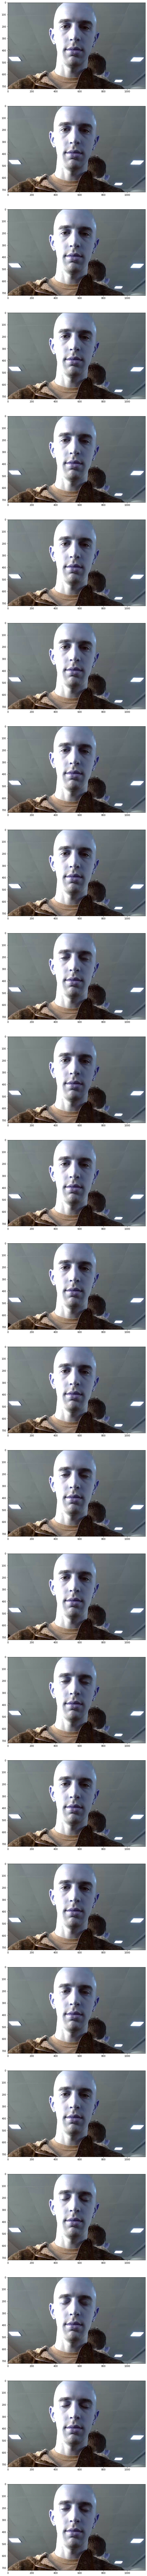

In [6]:
img=train_img
#print(len(img))
n=len(img)
f = plt.figure(figsize=(200, 200))
for i in range(n):
    # Debug, plot figure
    #img=plt.imread(i)
    f.add_subplot(n,1,i+1)
    plt.imshow(img[i])
        #cv2.imshow("Frame", frame)
plt.show(block=True)

In [7]:
y_pred=[]
threshold=[]
for i in range(n):
    #print(frame.shape)
    gray = cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:

        landmarks = predictor(gray, face)
        #print(landmarks)
        left_eye_ratio = get_blinking_ratio([36, 37, 38, 39, 40, 41], landmarks)
        right_eye_ratio = get_blinking_ratio([42, 43, 44, 45, 46, 47], landmarks)
        blinking_ratio = (left_eye_ratio + right_eye_ratio) / 2
        print(blinking_ratio)
        threshold.append(blinking_ratio)
        if blinking_ratio>4:
            #take_screenshot
            y_pred.append(1)
            #cv2.putText(img[i],"Take_screenshot: {}".format(blinking_ratio), (20, 20), font, 2, (255, 0, 0),2)
        elif blinking_ratio<4:
            y_pred.append(0)
            #cv2.putText(img[i], "Eyelids_open: {}".format(blinking_ratio), (20, 20), font,2, (255, 0, 0),2)
print(y_pred)

3.154736197432654
2.8356558798638347
3.0837551618250547
3.0026018420825435
3.0794621107389455
2.852440945185135
2.9935167259586315
3.2667302509233247
3.0124478982052434
4.0128327702733575
2.942298397663426
2.9872027188916093
2.7731277185729852
2.960757543125727
3.883366752003478
3.040307421235569
4.2594588288429565
3.1909698596025615
3.2651459271719943
3.1240239731730997
3.2037946838429985
4.81272119707519
3.833031343438954
4.829829335094999
4.491625049277237
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]


In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

accuracy=accuracy_score(train_label,y_pred)
print("Precision Score : ",precision_score(train_label,y_pred,average='micro'))
                                           
print("Recall Score : ",recall_score(train_label,y_pred,average='micro')) 
                                           
print("Accuracy Score :",accuracy)

Precision Score :  0.88
Recall Score :  0.88
Accuracy Score : 0.88


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(train_label,y_pred)
print(matrix)

[[19  2]
 [ 1  3]]


In [10]:
report = classification_report(train_label,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.60      0.75      0.67         4

    accuracy                           0.88        25
   macro avg       0.77      0.83      0.80        25
weighted avg       0.89      0.88      0.89        25



In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

mse=mean_squared_error(train_label,y_pred)
print(mse)

log_l=log_loss(train_label,y_pred)
print(log_l)
roc_auc=roc_auc_score(train_label,y_pred)
print(roc_auc)
      

0.12
4.144717135183698
0.8273809523809523


In [12]:
acc=[]
pres=[]
rec=[]
#print(len(threshold))
#for i in range(len(threshold)):
    #acc.append(accuracy_score(train_label,y_pred))
    #pres.append(precision_score(train_label,y_pred,average='micro'))
    #rec.append(recall_score(train_label,y_pred,average='micro'))
#print(acc)
#print(pres)
#print(rec)


In [13]:
#plt.figure(figsize=(30,10))
#plt.plot(threshold,acc, label = "accuracy", linewidth = 5)
#plt.plot(threshold,pres,label="precision", linewidth = 5)
#plt.plot(threshold,rec,label="recall", linewidth = 5)
#plt.grid(True)
#plt.xlabel("threshold", fontsize = 17)
#plt.ylabel("metric", fontsize = 17)
#plt.legend()
#plt.show()